# **확률적 경사 하강법(Stochastic Gradient Descent)**

- 점진적 학습의 대표적 알고리즘
- 앞서 훈련한 모델은 버리지 않고 새로운 데이터에 대해서만 조금씩 점진적으로 훈련하는 방법
  - 경사는 기울기를 말한다
  - 하나의 샘플을 훈련 세트에서 랜덤하게 고른다 = 확률적
  - 만족할만한 위치에 도달할 때까지 모든 샘플을 다 사용하며 경사를 내려간다
  - 훈련 세트를 한 번 모두 사용하는 과정 = 에포크(epoch)
    - 경사 하강법은 일반적으로 수십, 수백 번 이상 에포크를 수행
- 무작위로 몇 개의 샘플을 선택해서 경사를 따라 내려가는 방법 = 미니배치 경사 하강법
- 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 방법 = 배치 경사 하강법
- 훈련 데이터가 모두 준비되지 않고 매일 업데이트가 되는 상황에서 유용
- 신경망 알고리즘이 사용함
- sklearn.linear_model 패기지에 존재

## **손실 함수(Loss function)**

- 머신 러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준
- 샘플 하나에 대한 손실을 정의함
- 손실 함수의 값이 적을수록 좋다
  - 손실 함수는 미분 가능해야 한다
- 비용 함수라고도 함
  - 비용 함수(cost function) : 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합


### **문제 정의**

- 이전 7종의 생선 데이터뿐만 아니라 계속해서 새로운 데이터가 생기는 상황
- 이전 데이터도 유지하면서 새로운 생선 데이터도 적용하여 생선 종류 확률 예측

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
# 확률적 경사 하강법 모델링
from sklearn.linear_model import SGDClassifier
# loss는 손실 함수의 종류를 지정
# max_iter는 수행할 에포크 횟수를 지정
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [11]:
# 모델을 이어서 훈련할 때는 partial_fit()을 사용
# fit()과 같지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## **에포크의 과대/과소적합**

- 에포크가 진행됨에 따라 훈련 세트는 꾸준히 증가하지만 테스트 세트 점수는 어느 순간부터 감소
- 이 지점이 과대적합되기 시작하는 곳
- 과대적합이 시작하기 전에 훈련을 멈추는 것 : 조기 종료(early stopping)

In [12]:
# 에포크의 과대/과소적합 예제
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [13]:
for _ in range(0, 300) :
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

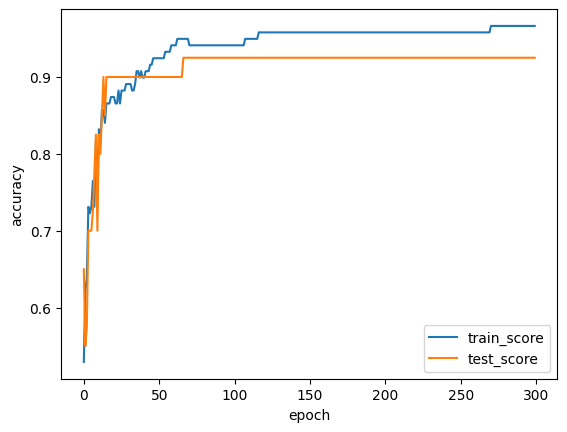

In [14]:
import matplotlib.pyplot as plt

plt.plot(train_score, label='train_score')
plt.plot(test_score, label='test_score')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [16]:
# 100번때 에포크가 가장 적합해보임
# SGDClassifier는 일정 에포크 동안 성능이 상승하지 않으면 자동으로 멈춤. 이를 방지하기 위해 tol를 None으로 지정
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
